## Input data

In [2]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import re
import string
import operator
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore")
import tokenization
from wordcloud import STOPWORDS

In [3]:
train = pd.read_csv("../input/explore_train.csv")
test = pd.read_csv("../input/explore_test.csv")

In [4]:
train.head()

,keyword,text,target
0,no_keyword,Our Deeds are the Reason of this #earthquake M...,1
1,no_keyword,Forest fire near La Ronge Sask. Canada,1
2,no_keyword,All residents asked to 'shelter in place' are ...,1
3,no_keyword,"13,000 people receive #wildfires evacuation or...",1
4,no_keyword,Just got sent this photo from Ruby #Alaska as ...,1


## Identify metafeatures

In [5]:
# word_count
train['word_count'] = train['text'].apply(lambda x: len(str(x).split()))
test['word_count'] = test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
train['unique_word_count'] = train['text'].apply(lambda x: len(set(str(x).split())))
test['unique_word_count'] = test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
train['stop_word_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test['stop_word_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
train['url_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
test['url_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
train['mean_word_length'] = train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test['mean_word_length'] = test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
train['char_count'] = train['text'].apply(lambda x: len(str(x)))
test['char_count'] = test['text'].apply(lambda x: len(str(x)))

# punctuation_count
train['punctuation_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
test['punctuation_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
train['hashtag_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
test['hashtag_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
train['mention_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
test['mention_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [15]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = train['target'] == 1
print(type(METAFEATURES))
print(type(DISASTER_TWEETS))

<class 'list'>
<class 'pandas.core.series.Series'>


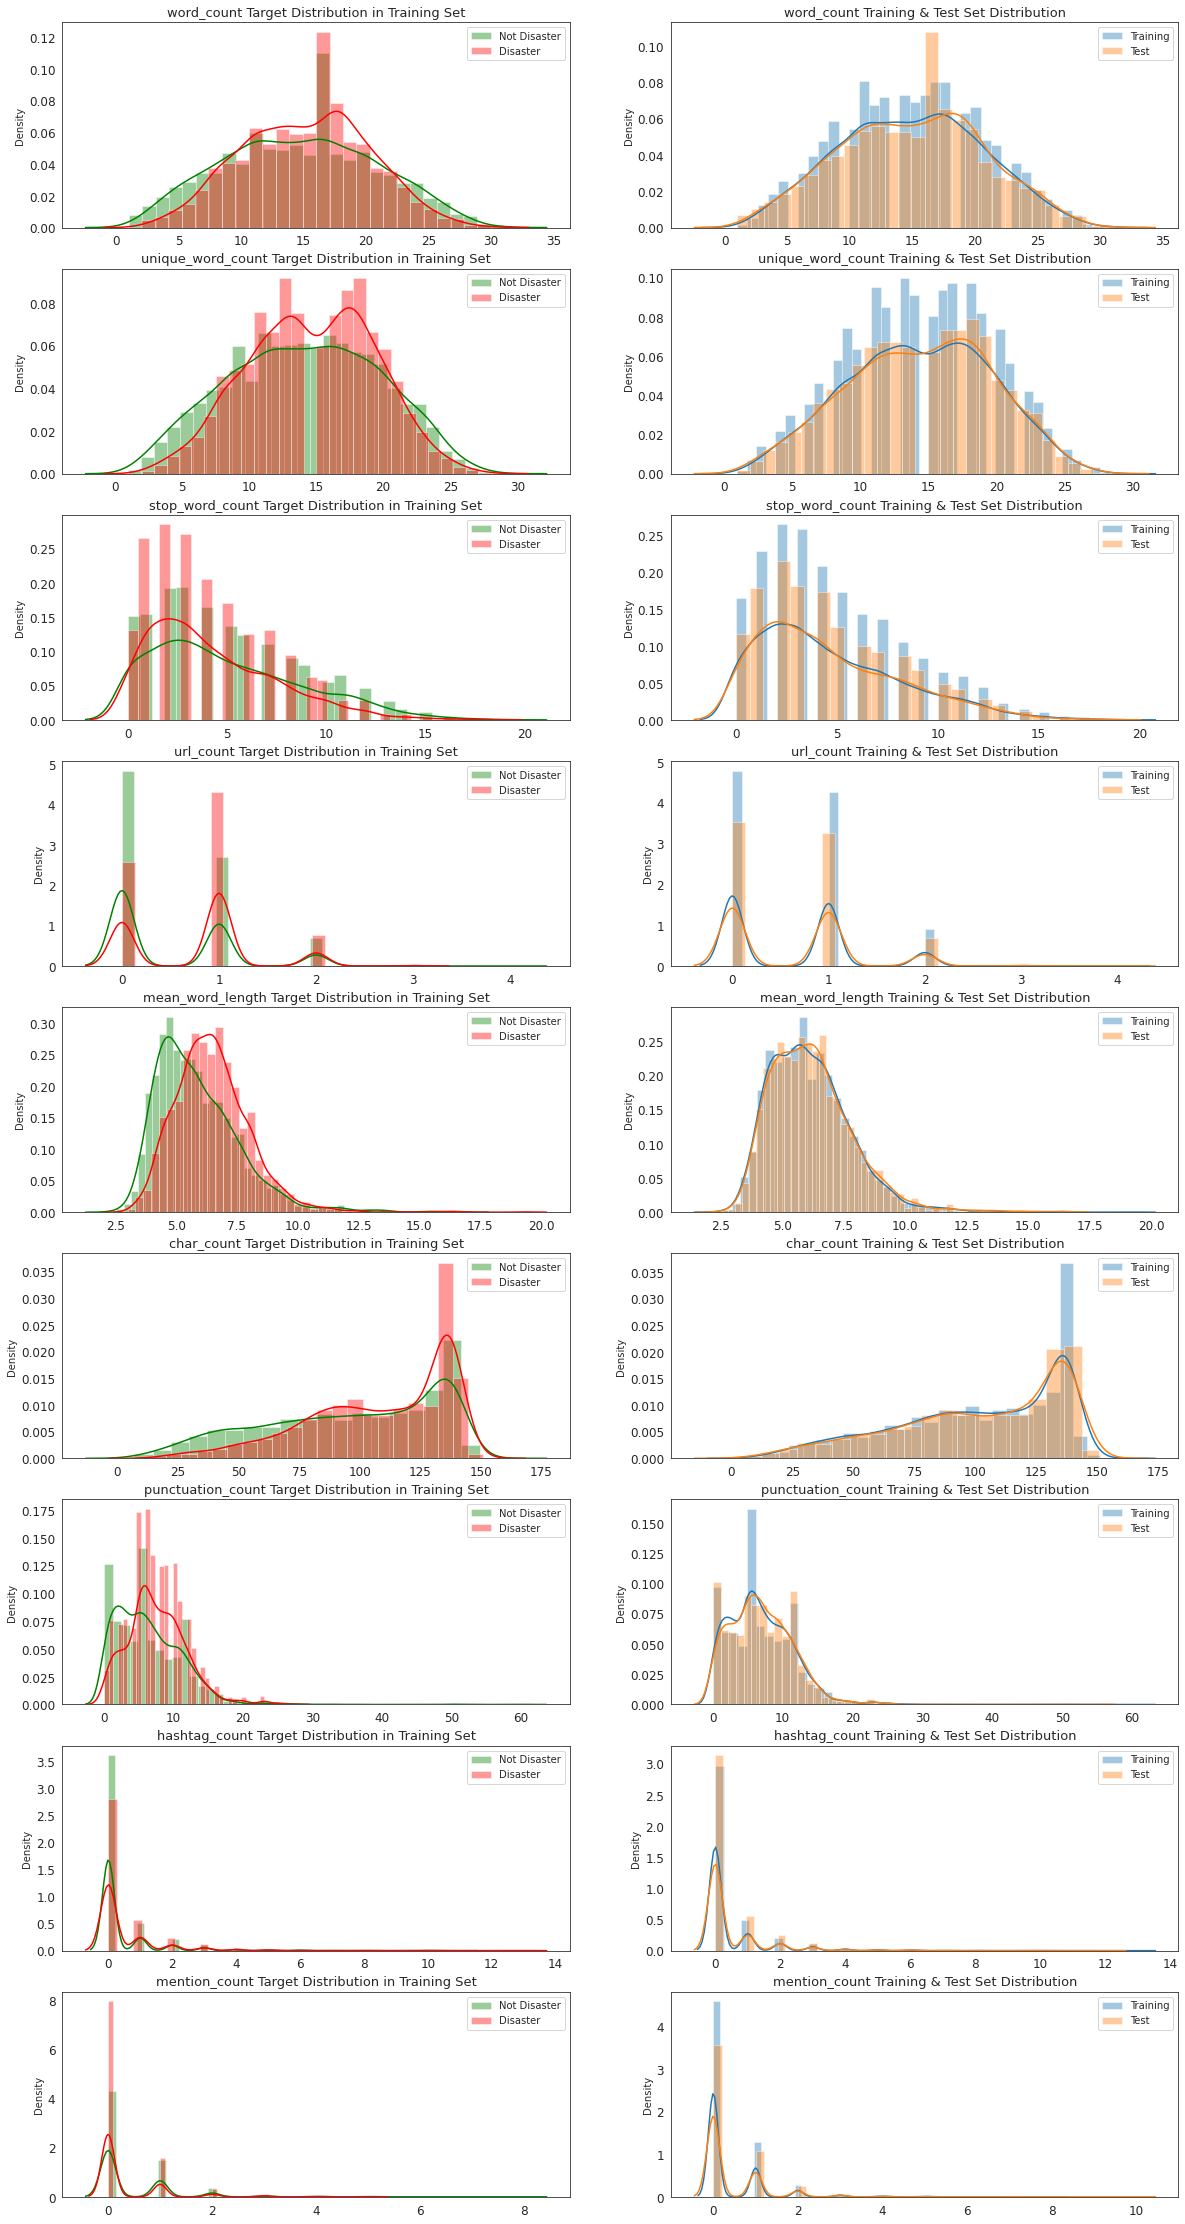

In [10]:
with sns.axes_style("white"):
    fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 40))

    for i, feature in enumerate(METAFEATURES):
        sns.distplot(train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
        sns.distplot(train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

        sns.distplot(train[feature], label='Training', ax=axes[i][1])
        sns.distplot(test[feature], label='Test', ax=axes[i][1])
        
        for j in range(2):
            axes[i][j].set_xlabel('')
            axes[i][j].tick_params(axis='x', labelsize=12)
            axes[i][j].tick_params(axis='y', labelsize=12)
            axes[i][j].legend()
        
        axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
        axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)